## Lab 2 31.01.2017

Alexander Plentsov, ISSA group

In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline
from datetime import datetime

### Clustering coefficient

During the lecture we have understood, that the clustering coefficient of a random graph is equal to the probability $p$: $$\text{Clustering coefficient} = \frac{\langle k \rangle}{n} = p $$

In this task you have to check it on generated data.
Please, generate $100$ Random Graphs with $n = 1000$ and $p = 0.002$ (for saving computational time) and plot the box-plot of your computations.

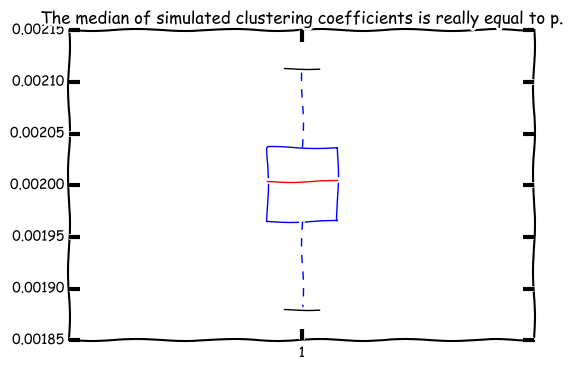

In [57]:
# As we are going to have a sparse graph (we have small probability p), we will use fast_gnp_random_graph
# for generation of random graphs. 

n_iter = 100
n = 1000
p = 0.002
cl_coefs = []
for i in range(n_iter):
    G = nx.fast_gnp_random_graph(n, p)
    cl_coef = np.mean(G.degree().values())/n
    cl_coefs.append(cl_coef)
plt.boxplot(cl_coefs)
plt.title("The median of simulated clustering coefficients is really equal to p.")
plt.show()

### Size of small components

In this task you are asked to calculate the average size of small components (small component = not a giant one) with regard to average degree of the network. To see the effect clearly, plot average size around $\langle k \rangle = 1$.

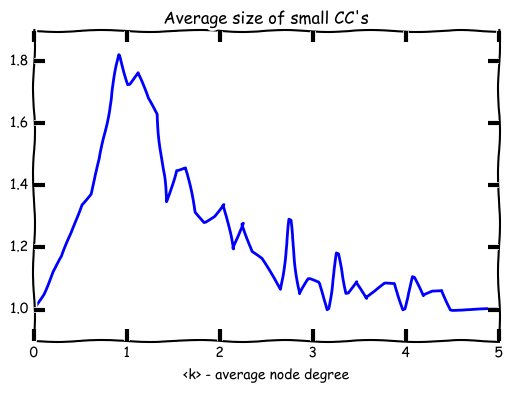

In [64]:
# Avg degree = 1 = pn, so with n = 1000, we need p = 0.001
# let's look on p in range 0.0005 - 0.0015

scc_sizes = []
n = 1000
p = np.linspace(0, 0.005)
k = p*n
n_iter = len(p)
for i in range(n_iter):
    G = nx.fast_gnp_random_graph(n, p[i])
    avg_size_scc = np.mean([len(x) for x in sorted(nx.connected_components(G), key=len, reverse=True)][1:])
    scc_sizes.append(avg_size_scc)

plt.plot(k, scc_sizes) 
plt.xlabel('<k> - average node degree')
plt.title("Average size of small CC's")
plt.show()

As we can see until average node degree less than 1, there is no formation of a strong GCC, so size of small ones increases. After that there is a sharpe decrese to the level of 1 node.

### Average path length and transitivity

Plot the average path length and transitivity coefficents with $n=1000$ and p=0.001 while increasing by 0.003 

In [66]:
n = 1000
p = np.arange(0.001, 0.1, 0.003)

start = datetime.now()
n_iter = len(p)
trs = []
lens = []
for i in range(n_iter):
    G = nx.fast_gnp_random_graph(n, p[i])
    tr = nx.transitivity(G)
    trs.append(tr)
    
    # in case graph is not connected let's calculate the average path in the GCC
    gcc = max(nx.connected_component_subgraphs(G), key=len)
    l = nx.average_shortest_path_length(gcc)
    lens.append(l)

print "Time elapsed:", datetime.now() - start

Time elapsed: 0:03:41.198897


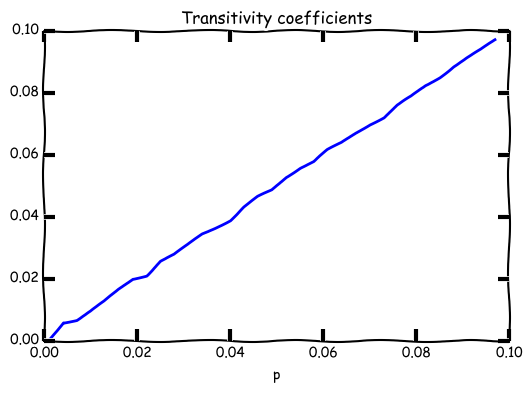

In [67]:
plt.plot(p, trs)
plt.title('Transitivity coefficients')
plt.xlabel('p')
plt.show()

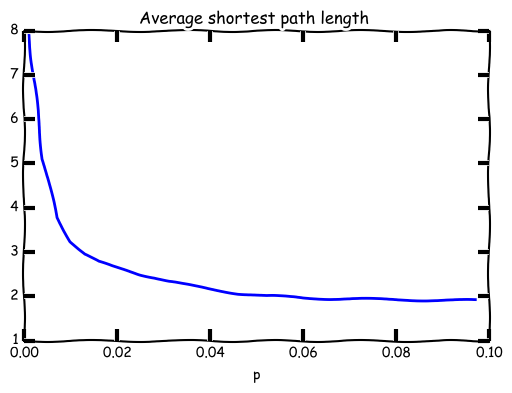

In [68]:
plt.plot(p, lens)
plt.title('Average shortest path length ')
plt.xlabel('p')
plt.show()